Saving data_description.txt to data_description (1).txt
Saving sample_submission.csv to sample_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (2).csv
MAE : 34,396
RMSE: 51,223
R^2 : 0.658

Coefficients:
GrLivArea   : 94.66
BedroomAbvGr: -23,244.43
TotalBaths  : 30,177.98
Intercept   : 36,976.45


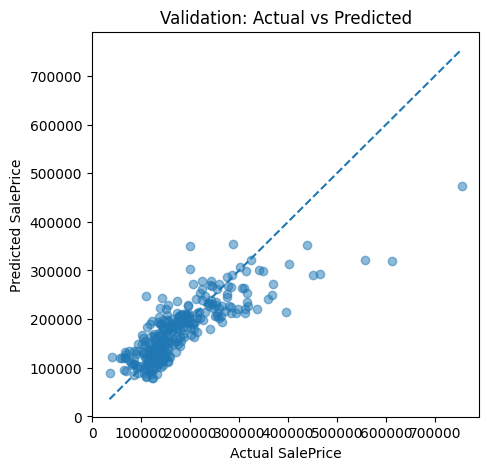

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()  # pick train.csv, test.csv, sample_submission.csv
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub   = pd.read_csv('sample_submission.csv')
train.head(), test.head()
def add_features(df):
    df = df.copy()
    # build a single bathrooms feature
    for c in ['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']:
        if c not in df:  # safety for unusual files
            df[c] = 0
    df['TotalBaths'] = (
        df['FullBath'].fillna(0) +
        0.5*df['HalfBath'].fillna(0) +
        df['BsmtFullBath'].fillna(0) +
        0.5*df['BsmtHalfBath'].fillna(0)
    )
    return df
train_fe = add_features(train)
test_fe  = add_features(test)

features = ['GrLivArea','BedroomAbvGr','TotalBaths']
X = train_fe[features].fillna(0)
y = train_fe['SalePrice']           # target
X_test = test_fe[features].fillna(0)
X.describe(), y.describe()
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_tr, y_tr)

val_pred = model.predict(X_val)

mae  = mean_absolute_error(y_val, val_pred)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
r2   = r2_score(y_val, val_pred)

print(f"MAE : {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R^2 : {r2:.3f}")

print("\nCoefficients:")
for name, w in zip(features, model.coef_):
    print(f"{name:12s}: {w:,.2f}")
print(f"Intercept   : {model.intercept_:,.2f}")
plt.figure(figsize=(5,5))
plt.scatter(y_val, val_pred, alpha=0.5)
mn, mx = y_val.min(), y_val.max()
plt.plot([mn,mx],[mn,mx],'--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Validation: Actual vs Predicted")
plt.show()
model.fit(X, y)
test_pred = model.predict(X_test)

# build submission file
submission = sub.copy()
submission['SalePrice'] = test_pred
submission.head()
submission.to_csv('submission.csv', index=False)
files.download('submission.csv')
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10.0).fit(X_tr, y_tr)